In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_data.csv')
df.head()

,week_date,total_sales,cost_iron,cost_aluminum,cost_energy,fx_rate,ev_sales
0,28/12/2020,10932394,1.39,1645.84,0.0676,1.2271,79409
1,04/01/2021,3686280,1.39,1645.84,0.0676,1.2296,79409
2,11/01/2021,8965000,1.39,1645.84,0.0676,1.2163,79409
3,18/01/2021,11766983,1.39,1645.84,0.0676,1.2064,79409
4,25/01/2021,4926779,1.39,1645.84,0.0676,1.2152,79409


In [3]:
df['week_date'] = pd.to_datetime(df['week_date'], format='%d/%m/%Y')
df.set_index('week_date', inplace=True)

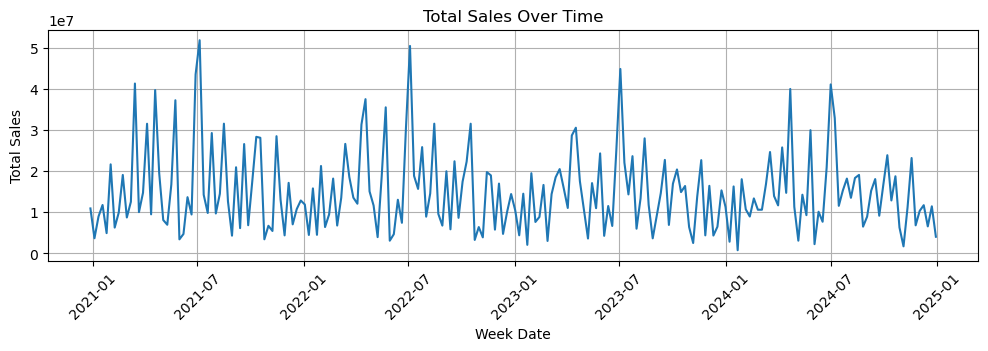

In [4]:
plt.figure(figsize=(12,3))
plt.plot(df.index, df["total_sales"])
plt.title('Total Sales Over Time')
plt.xlabel('Week Date')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


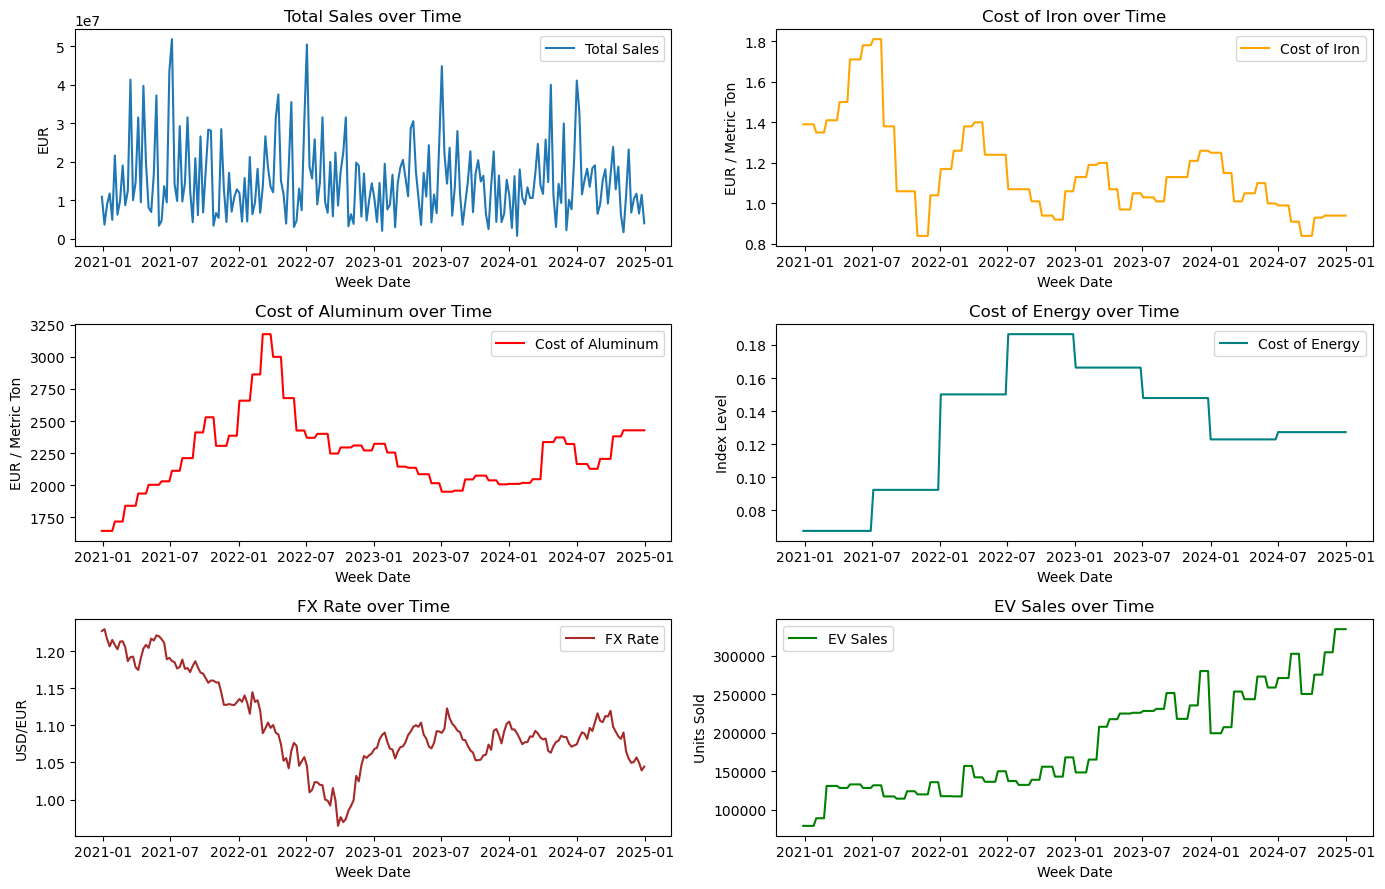

In [39]:
plt.figure(figsize=(14, 9))

# Subplot 1: Total Sales
plt.subplot(3, 2, 1)
plt.plot(df.index, df['total_sales'], label='Total Sales')
plt.title('Total Sales over Time')
plt.xlabel('Week Date')
plt.ylabel('EUR')
plt.legend()

# Subplot 2: Cost of Iron
plt.subplot(3, 2, 2)
plt.plot(df.index, df['cost_iron'], label='Cost of Iron', color='orange')
plt.title('Cost of Iron over Time')
plt.xlabel('Week Date')
plt.ylabel('EUR / Metric Ton')
plt.legend()

# Subplot 3: Cost of Aluminum
plt.subplot(3, 2, 3)
plt.plot(df.index, df['cost_aluminum'], label='Cost of Aluminum', color='red')
plt.title('Cost of Aluminum over Time')
plt.xlabel('Week Date')
plt.ylabel('EUR / Metric Ton')
plt.legend()

# Subplot 4: Cost of Energy
plt.subplot(3, 2, 4)
plt.plot(df.index, df['cost_energy'], label='Cost of Energy', color='teal')
plt.title('Cost of Energy over Time')
plt.xlabel('Week Date')
plt.ylabel('Index Level')
plt.legend()

# Subplot 5: FX Rate
plt.subplot(3, 2, 5)
plt.plot(df.index, df['fx_rate'], label='FX Rate', color='brown')
plt.title('FX Rate over Time')
plt.xlabel('Week Date')
plt.ylabel('USD/EUR')
plt.legend()

# Subplot 6: EV Sales
plt.subplot(3, 2, 6)
plt.plot(df.index, df['ev_sales'], label='EV Sales', color='green')
plt.title('EV Sales over Time')
plt.xlabel('Week Date')
plt.ylabel('Units Sold')
plt.legend()

plt.tight_layout()
plt.show()

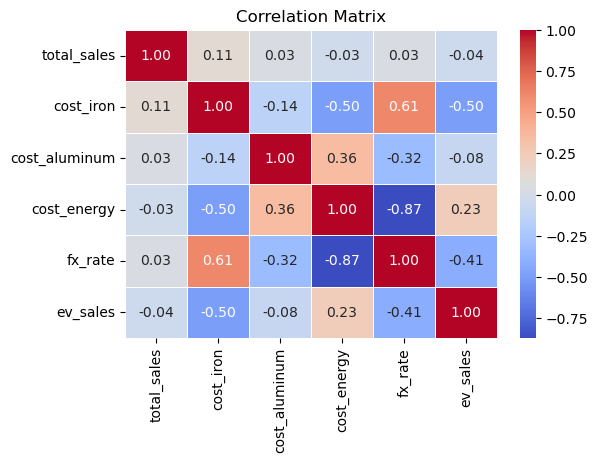

In [63]:
correlation_matrix = df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

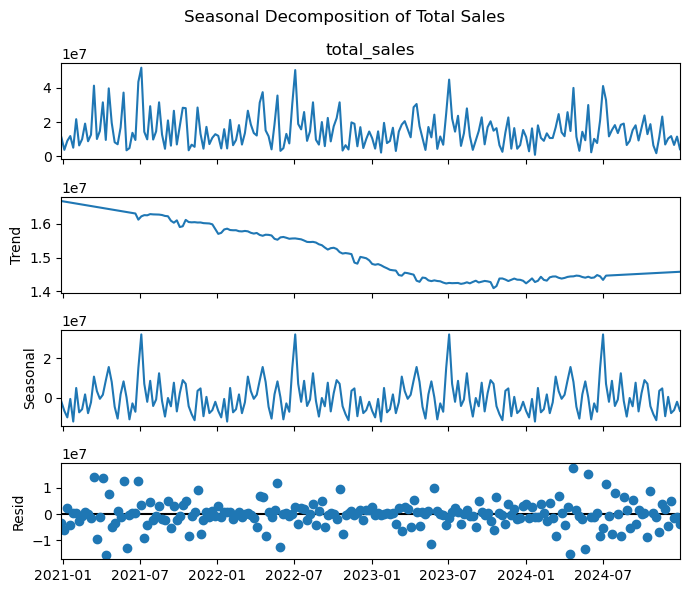

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(
    df['total_sales'], extrapolate_trend='freq')

# Create a larger figure
fig = result.plot()
fig.set_size_inches(7, 6)  # Adjust width and height as needed
fig.suptitle('Seasonal Decomposition of Total Sales')
plt.tight_layout()
plt.show()

In [44]:
from scipy.stats import skew

skewness = skew(df['total_sales'])
print(f"Skewness of total_sales: {skewness:.2f}")

if skewness > 1:
    print("The distribution is highly positively skewed.")
elif skewness > 0.5:
    print("The distribution is moderately positively skewed.")
elif skewness < -1:
    print("The distribution is highly negatively skewed.")
elif skewness < -0.5:
    print("The distribution is moderately negatively skewed.")
else:
    print("The distribution is approximately symmetric.")

Skewness of total_sales: 1.21
The distribution is highly positively skewed.


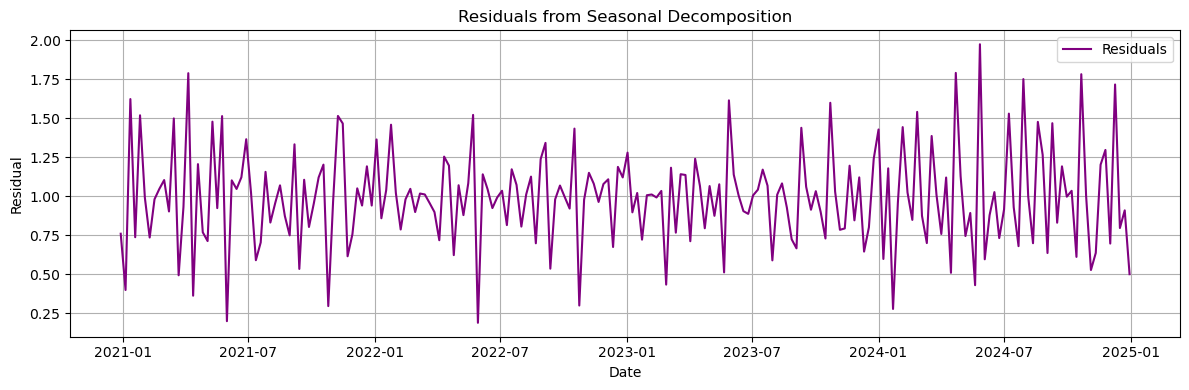

In [ ]:
# Plot only the residuals
plt.figure(figsize=(12, 4))
plt.plot(result.resid, label='Residuals', color='purple')
plt.title('Residuals of Total Sales')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

#ADF test
result = adfuller(df['total_sales'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] < 0.05:
    print("The series is stationary (reject H0).")
else:
    print("The series is non-stationary (fail to reject H0).")

ADF Statistic: -5.101288
p-value: 0.000014
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
The series is stationary (reject H0).


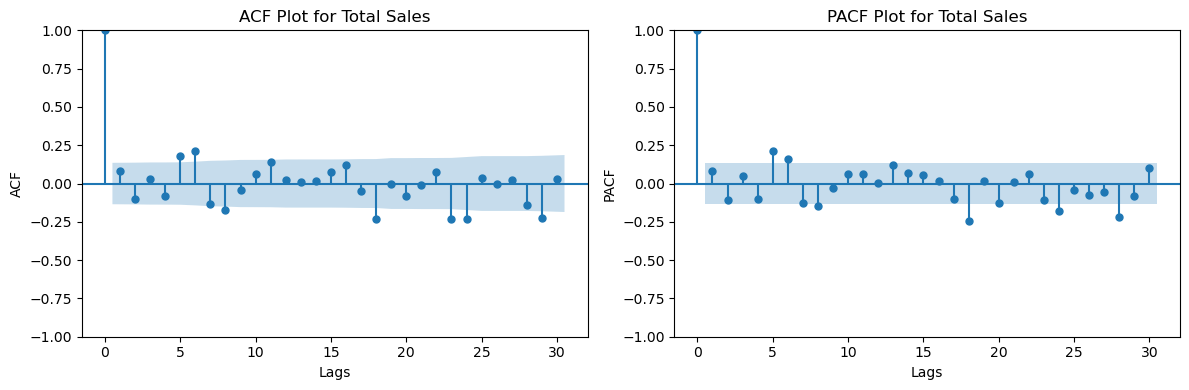

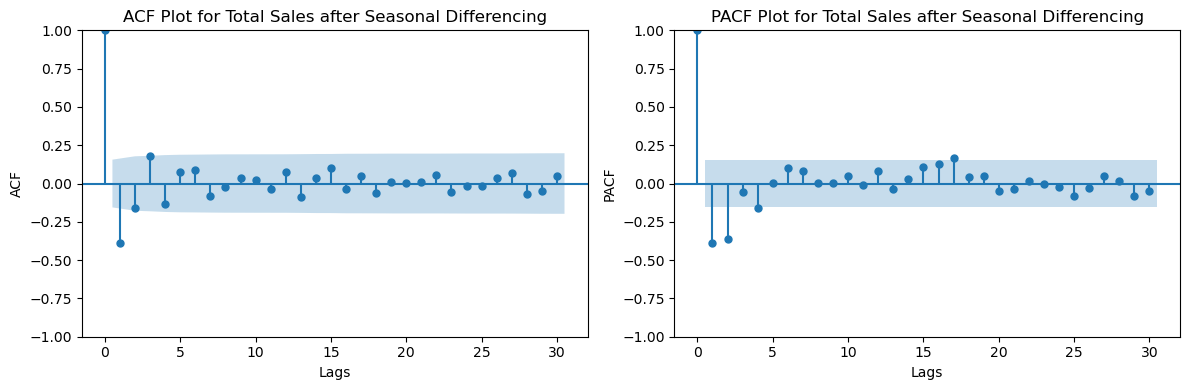

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot ACF
plot_acf(df['total_sales'], lags=30, ax=axes[0])
axes[0].set_title('ACF Plot for Total Sales')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('ACF')

# Plot PACF
plot_pacf(df['total_sales'], lags=30, ax=axes[1])
axes[1].set_title('PACF Plot for Total Sales')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()

y_seasonal = df['total_sales'].diff(52).dropna()
# Plot ACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

plot_acf(y_seasonal, lags=30, ax=axes[0])
axes[0].set_title('ACF Plot for Total Sales after Seasonal Differencing')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('ACF')

# Plot PACF
plot_pacf(y_seasonal, lags=30, ax=axes[1])
axes[1].set_title('PACF Plot for Total Sales after Seasonal Differencing')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()
